In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "data/indicadores_trajetoria/indicadores_trajetoria_educacao_superior_all.parquet"
df = pd.read_parquet(file_path)  # Assuming the first row contains the header
df.head()

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,...,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA,source_file
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,94.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,data/indicadores_trajetoria/indicadores_trajet...
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,90.0,0.0,4.0,0.0,95.744681,0.000000,4.255319,0.000000,4.255319,data/indicadores_trajetoria/indicadores_trajet...
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,85.0,1.0,4.0,0.0,90.425532,1.063830,8.510638,1.063830,4.255319,data/indicadores_trajetoria/indicadores_trajet...
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,79.0,4.0,2.0,0.0,84.042553,5.319149,10.638298,4.255319,2.127660,data/indicadores_trajetoria/indicadores_trajet...
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1.0,1.0,1.0,DIREITO,5.0,51.0,5103403.0,1.0,...,24.0,53.0,2.0,0.0,25.531915,61.702128,12.765957,56.382979,2.127660,data/indicadores_trajetoria/indicadores_trajet...


In [3]:
df = df.dropna()

In [4]:
new_columns = [
    "Código da Instituição", "Nome da Instituição", "Categoria Administrativa", "Organização Acadêmica",
    "Código do Curso de Graduação", "Nome do Curso de Graduação", "Código da Região Geográfica do Curso",
    "Código da Unidade Federativa do Curso", "Código do Município do Curso", "Grau Acadêmico", 
    "Modalidade de Ensino", "Código da área do Curso segundo a classificação CINE BRASIL", 
    "Nome da área do Curso segundo a classificação CINE BRASIL", 
    "Código da Grande Área do Curso segundo a classificação CINE BRASIL", 
    "Nome da Grande Área do Curso segundo a classificação CINE BRASIL", "Ano de Ingresso", "Ano de Referência",
    "Prazo de Integralização em Anos", "Ano de Integralização do Curso", 
    "Prazo de Acompanhamento do Curso em anos", "Ano Máximo de Acompanhamento do Curso", 
    "Quantidade de Ingressantes no Curso", "Quantidade de Permanência no Curso no ano de referência", 
    "Quantidade de Concluintes no Curso no ano de referência", 
    "Quantidade de Desistência no Curso no ano de referência", 
    "Quantidade de Falecimentos no Curso no ano de referência", "Taxa de Permanência - TAP", 
    "Taxa de Conclusão Acumulada - TCA", "Taxa de Desistência Acumulada - TDA", 
    "Taxa de Conclusão Anual - TCAN", "Taxa de Desistência Anual - TADA",
    "source_file"
]
df.columns = new_columns

In [5]:
categoria_administrativa_dict = {
    1: "Pública Federal",
    2: "Pública Estadual",
    3: "Pública Municipal",
    4: "Privada com fins lucrativos",
    5: "Privada sem fins lucrativos",
    7: "Especial"
}

organizacao_academica_dict = {
    1: "Universidade",
    2: "Centro Universitário",
    3: "Faculdade",
    4: "Instituto Federal de Educação Ciência e Tecnologia",
    5: "Centro Federal de Educação Tecnológica"
}

regiao_geografica_dict = {
    1: "Região Norte",
    2: "Região Nordeste",
    3: "Região Sudeste",
    4: "Região Sul",
    5: "Região Centro-Oeste"
}

grau_academico_dict = {
    1: "Bacharelado",
    2: "Licenciatura",
    3: "Tecnológico"
}

modalidade_ensino_dict = {
    1: "Presencial",
    2: "Curso a distância"
}

In [6]:
df['Categoria Administrativa'] = df['Categoria Administrativa'].replace(categoria_administrativa_dict)
df['Organização Acadêmica'] = df['Organização Acadêmica'].replace(organizacao_academica_dict)
df['Código da Região Geográfica do Curso'] = df['Código da Região Geográfica do Curso'].replace(regiao_geografica_dict)
df['Grau Acadêmico'] = df['Grau Acadêmico'].replace(grau_academico_dict)
df['Modalidade de Ensino'] = df['Modalidade de Ensino'].replace(modalidade_ensino_dict)

In [7]:
df = df.drop(['Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Código da área do Curso segundo a classificação CINE BRASIL'], axis=1)

In [8]:
df.columns

Index(['Código da Instituição', 'Nome da Instituição',
       'Categoria Administrativa', 'Organização Acadêmica',
       'Código do Curso de Graduação', 'Nome do Curso de Graduação',
       'Código da Região Geográfica do Curso',
       'Código da Unidade Federativa do Curso', 'Código do Município do Curso',
       'Grau Acadêmico', 'Modalidade de Ensino',
       'Nome da área do Curso segundo a classificação CINE BRASIL',
       'Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
       'Ano de Ingresso', 'Ano de Referência',
       'Prazo de Integralização em Anos', 'Ano de Integralização do Curso',
       'Prazo de Acompanhamento do Curso em anos',
       'Ano Máximo de Acompanhamento do Curso',
       'Quantidade de Ingressantes no Curso',
       'Quantidade de Permanência no Curso no ano de referência',
       'Quantidade de Concluintes no Curso no ano de referência',
       'Quantidade de Desistência no Curso no ano de referência',
       'Quantidade de Falecimen

In [9]:
df.to_parquet("data/indicadores_trajetoria/indicadores_trajetoria_educacao_limpo.parquet")

In [ ]:
def create_institution_type_cohort(df):
    """
    Creates institutional cohorts that combine administrative category and academic organization.
    This grouping helps us understand how different institutional structures affect student outcomes.
    
    For example, this could reveal whether private universities have different dropout patterns
    compared to federal universities, or if faculties show different patterns than university centers.
    """
    df['institution_type_cohort'] = (
        df['Categoria Administrativa'] + ' - ' + 
        df['Organização Acadêmica']
    )
    return df

def create_program_delivery_cohort(df):
    """
    Creates cohorts based on how programs are delivered, combining academic degree type
    and teaching modality. This helps understand if the way a program is structured and
    delivered impacts student retention.
    
    For instance, we can see if distance learning bachelor's degrees have different
    dropout patterns compared to in-person technological degrees.
    """
    df['program_delivery_cohort'] = (
        df['Grau Acadêmico'] + ' - ' +
        df['Modalidade de Ensino'] + ' - ' +
        df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL']
    )
    return df

def create_regional_program_cohort(df):
    """
    Creates cohorts that combine geographical region with program characteristics.
    This helps identify if certain types of programs have different success rates
    in different regions of Brazil.
    """
    df['regional_program_cohort'] = (
        df['Código da Região Geográfica do Curso'] + ' - ' +
        df['Nome da Grande Área do Curso segundo a classificação CINE BRASIL']
    )
    return df

def create_ingress_year_cohort(df):
    """
    Creates cohorts based on the year students entered their program.
    This helps analyze if outcomes are changing over time (improving or worsening).
    
    For instance, we can see if students who enrolled in 2015 had different 
    dropout patterns compared to those who enrolled in 2018.
    """
    # Convert to integer then string to ensure proper cohort grouping
    # Handle potential NaN values first
    df['ingress_year_cohort'] = 'Cohort ' + df['Ano de Ingresso'].fillna(0).astype(int).astype(str)
    return df

def analyze_cohort_patterns(df):
    """
    Performs a comprehensive analysis of dropout patterns across different cohort groupings.
    Returns summary statistics for each cohort type to help identify significant patterns.
    """
    # Create all cohort groupings
    df = create_institution_type_cohort(df)
    df = create_program_delivery_cohort(df)
    df = create_regional_program_cohort(df)
    df = create_ingress_year_cohort(df)  # Add this line
    
    # Calculate key metrics for each cohort
    cohort_analyses = {}
    
    # Analyze dropout rates by institution type
    institution_analysis = df.groupby('institution_type_cohort').agg({
        'Taxa de Desistência Acumulada - TDA': ['mean', 'std', 'count'],
        'Taxa de Conclusão Acumulada - TCA': ['mean', 'std']
    }).round(2)
    
    # Analyze completion rates by program delivery method
    program_analysis = df.groupby('program_delivery_cohort').agg({
        'Taxa de Desistência Acumulada - TDA': ['mean', 'std', 'count'],
        'Taxa de Conclusão Acumulada - TCA': ['mean', 'std']
    }).round(2)
    
    # Analyze regional patterns
    regional_analysis = df.groupby('regional_program_cohort').agg({
        'Taxa de Desistência Acumulada - TDA': ['mean', 'std', 'count'],
        'Taxa de Conclusão Acumulada - TCA': ['mean', 'std']
    }).round(2)
    
    # Add analysis by ingress year
    year_analysis = df.groupby('ingress_year_cohort').agg({
        'Taxa de Desistência Acumulada - TDA': ['mean', 'std', 'count'],
        'Taxa de Conclusão Acumulada - TCA': ['mean', 'std']
    }).round(2)
    
    cohort_analyses = {
        'institution_patterns': institution_analysis,
        'program_patterns': program_analysis,
        'regional_patterns': regional_analysis,
        'year_patterns': year_analysis  # Add this line
    }
    
    return cohort_analyses

: 

In [11]:
df.dropna(inplace=True)

In [12]:
# identifier_columns = [
#     "Código da Instituição", 
#     "Código do Curso de Graduação", 
#     "Código da Região Geográfica do Curso", 
#     "Código da Unidade Federativa do Curso", 
#     "Código do Município do Curso", 
#     "Código da área do Curso segundo a classificação CINE BRASIL",
#     "Código da Grande Área do Curso segundo a classificação CINE BRASIL"
# ]

# df = df.drop(columns=identifier_columns)

In [13]:
# categorical_features = [
#     "Nome da Instituição", 
#     "Categoria Administrativa", 
#     "Organização Acadêmica",
#     "Nome do Curso de Graduação",
#     'Grau Acadêmico',
#     'Modalidade de Ensino',
#     "Nome da área do Curso segundo a classificação CINE BRASIL",
#     "Nome da Grande Área do Curso segundo a classificação CINE BRASIL",
#     'Ano de Ingresso', 
#     'Ano de Referência', 
#     'Ano de Integralização do Curso',
#     'Ano Máximo de Acompanhamento do Curso'
# ]
# df[categorical_features] = df[categorical_features].astype('category')
df

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,...,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual - TADA,source_file
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,...,94.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,data/indicadores_trajetoria/indicadores_trajet...
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,...,90.0,0.0,4.0,0.0,95.744681,0.000000,4.255319,0.000000,4.255319,data/indicadores_trajetoria/indicadores_trajet...
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,...,85.0,1.0,4.0,0.0,90.425532,1.063830,8.510638,1.063830,4.255319,data/indicadores_trajetoria/indicadores_trajet...
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,...,79.0,4.0,2.0,0.0,84.042553,5.319149,10.638298,4.255319,2.127660,data/indicadores_trajetoria/indicadores_trajet...
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,Universidade,DIREITO,Região Centro-Oeste,51.0,5103403.0,Bacharelado,Presencial,...,24.0,53.0,2.0,0.0,25.531915,61.702128,12.765957,56.382979,2.127660,data/indicadores_trajetoria/indicadores_trajet...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142021,29118,Universidade Federal do Norte do Tocantins,Pública Federal,Universidade,MEDICINA,Região Norte,17.0,1702109.0,Bacharelado,Presencial,...,53.0,0.0,1.0,0.0,98.148148,0.000000,1.851852,0.000000,1.851852,data/indicadores_trajetoria/indicadores_trajet...
2142022,29118,Universidade Federal do Norte do Tocantins,Pública Federal,Universidade,MEDICINA,Região Norte,17.0,1702109.0,Bacharelado,Presencial,...,52.0,0.0,1.0,0.0,96.296296,0.000000,3.703704,0.000000,1.851852,data/indicadores_trajetoria/indicadores_trajet...
2142023,29118,Universidade Federal do Norte do Tocantins,Pública Federal,Universidade,MEDICINA,Região Norte,17.0,1702109.0,Bacharelado,Presencial,...,52.0,0.0,0.0,0.0,96.296296,0.000000,3.703704,0.000000,0.000000,data/indicadores_trajetoria/indicadores_trajet...
2142024,29118,Universidade Federal do Norte do Tocantins,Pública Federal,Universidade,MEDICINA,Região Norte,17.0,1702109.0,Bacharelado,Presencial,...,49.0,0.0,3.0,0.0,90.740741,0.000000,9.259259,0.000000,5.555556,data/indicadores_trajetoria/indicadores_trajet...


In [14]:
df.columns

Index(['Código da Instituição', 'Nome da Instituição',
       'Categoria Administrativa', 'Organização Acadêmica',
       'Nome do Curso de Graduação', 'Código da Região Geográfica do Curso',
       'Código da Unidade Federativa do Curso', 'Código do Município do Curso',
       'Grau Acadêmico', 'Modalidade de Ensino',
       'Nome da área do Curso segundo a classificação CINE BRASIL',
       'Nome da Grande Área do Curso segundo a classificação CINE BRASIL',
       'Ano de Ingresso', 'Ano de Referência',
       'Prazo de Integralização em Anos', 'Ano de Integralização do Curso',
       'Prazo de Acompanhamento do Curso em anos',
       'Ano Máximo de Acompanhamento do Curso',
       'Quantidade de Ingressantes no Curso',
       'Quantidade de Permanência no Curso no ano de referência',
       'Quantidade de Concluintes no Curso no ano de referência',
       'Quantidade de Desistência no Curso no ano de referência',
       'Quantidade de Falecimentos no Curso no ano de referência',
   

In [15]:
# df.to_csv('clenaed.csv')

In [16]:
analysis_results = analyze_cohort_patterns(df)

# Look at specific patterns
print("Institution Type Patterns:")
# print(analysis_results['institution_patterns'].head())
analysis_results['institution_patterns']

Institution Type Patterns:


Taxa de Desistência Acumulada - TDA  \
                                                                                  mean   
institution_type_cohort                                                                  
Especial - Centro Universitário                                                  33.40   
Especial - Faculdade                                                             38.57   
Especial - Universidade                                                          47.52   
Privada com fins lucrativos - Centro Universitário                               47.33   
Privada com fins lucrativos - Faculdade                                          48.55   
Privada com fins lucrativos - Universidade                                       54.07   
Privada sem fins lucrativos - Centro Universitário                               44.10   
Privada sem fins lucrativos - Faculdade                                          41.41   
Privada sem fins lucrativos - Universidade                                       43.32   
Pública Estadual - Centro Universitário                                          58.86   
Pública Estadual - Faculdade                                                     44.36   
Pública Estadual - Universidade                                                  33.03   
Pública Federal - Centro Federal de Educação Te...                               40.63   
Pública Federal - Centro Universitário                                           10.95   
Pública Federal - Faculdade                                                      15.59   
Pública Federal - Instituto Federal de Educação...                               46.14   
Pública Federal - Universidade                                                   36.56   
Pública Municipal - Centro Universitário                                         38.56   
Pública Municipal - Faculdade                                                    35.15   
Pública Municipal - Universidade                                                 40.52   

                                                                   \
                                                      std   count   
institution_type_cohort                                             
Especial - Centro Universitário                     22.67    5173   
Especial - Faculdade                                20.65    6941   
Especial - Universidade                             23.59    5038   
Privada com fins lucrativos - Centro Universitário  25.36  291427   
Privada com fins lucrativos - Faculdade             27.71  322533   
Privada com fins lucrativos - Universidade          25.04  185471   
Privada sem fins lucrativos - Centro Universitário  24.38  196075   
Privada sem fins lucrativos - Faculdade             26.62  176210   
Privada sem fins lucrativos - Universidade          24.09  233168   
Pública Estadual - Centro Universitário             27.44     312   
Pública Estadual - Faculdade                        23.47   18201   
Pública Estadual - Universidade                     24.38  180608   
Pública Federal - Centro Federal de Educação Te...  20.84    3115   
Pública Federal - Centro Universitário              15.08      45   
Pública Federal - Faculdade                         21.72    1400   
Pública Federal - Instituto Federal de Educação...  23.49   77863   
Pública Federal - Universidade                      24.82  313140   
Pública Municipal - Centro Universitário            23.82    3083   
Pública Municipal - Faculdade                       24.91    8658   
Pública Municipal - Universidade                    22.48    9133   

                                                   Taxa de Conclusão Acumulada - TCA  \
                                                                                mean   
institution_type_cohort                                                                
Especial - Centro Universitário                                                35.14   
Especial - Faculdade                    

In [17]:
print("\nProgram Delivery Patterns:")
# print(analysis_results['program_patterns'].head())
analysis_results['program_patterns']


Program Delivery Patterns:


Taxa de Desistência Acumulada - TDA  \
                                                                                  mean   
program_delivery_cohort                                                                  
Bacharelado - Presencial - Agricultura, silvicu...                               35.69   
Bacharelado - Presencial - Artes e humanidades                                   39.37   
Bacharelado - Presencial - Ciências naturais, m...                               43.64   
Bacharelado - Presencial - Ciências sociais, co...                               41.45   
Bacharelado - Presencial - Computação e Tecnolo...                               51.11   
Bacharelado - Presencial - Educação                                              49.16   
Bacharelado - Presencial - Engenharia, produção...                               45.94   
Bacharelado - Presencial - Negócios, administra...                               43.96   
Bacharelado - Presencial - Saúde e bem-estar                                     38.21   
Bacharelado - Presencial - Serviços                                              48.60   
Licenciatura - Presencial - Ciências naturais, ...                               53.81   
Licenciatura - Presencial - Educação                                             41.73   
Tecnológico - Presencial - Agricultura, silvicu...                               50.80   
Tecnológico - Presencial - Artes e humanidades                                   49.21   
Tecnológico - Presencial - Ciências naturais, m...                               50.68   
Tecnológico - Presencial - Computação e Tecnolo...                               54.10   
Tecnológico - Presencial - Educação                                              47.01   
Tecnológico - Presencial - Engenharia, produção...                               53.17   
Tecnológico - Presencial - Negócios, administra...                               47.60   
Tecnológico - Presencial - Saúde e bem-estar                                     47.94   
Tecnológico - Presencial - Serviços                                              46.41   

                                                                   \
                                                      std   count   
program_delivery_cohort                                             
Bacharelado - Presencial - Agricultura, silvicu...  21.96   57152   
Bacharelado - Presencial - Artes e humanidades      26.95   60461   
Bacharelado - Presencial - Ciências naturais, m...  26.47   55877   
Bacharelado - Presencial - Ciências sociais, co...  24.91  113120   
Bacharelado - Presencial - Computação e Tecnolo...  26.09   67035   
Bacharelado - Presencial - Educação                 31.92     461   
Bacharelado - Presencial - Engenharia, produção...  26.21  269482   
Bacharelado - Presencial - Negócios, administra...  25.43  352877   
Bacharelado - Presencial - Saúde e bem-estar        24.36  301857   
Bacharelado - Presencial - Serviços                 28.19   13950   
Licenciatura - Presencial - Ciências naturais, ...  25.98      44   
Licenciatura - Presencial - Educação                26.50  396175   
Tecnológico - Presencial - Agricultura, silvicu...  25.41    7631   
Tecnológico - Presencial - Artes e humanidades      25.24   28947   
Tecnológico - Presencial - Ciências naturais, m...  24.36    2339   
Tecnológico - Presencial - Computação e Tecnolo...  26.02   67952   
Tecnológico - Presencial - Educação                 28.19     144   
Tecnológico - Presencial - Engenharia, produção...  26.29   44353   
Tecnológico - Presencial - Negócios, administra...  25.56  152462   
Tecnológico - Presencial - Saúde e bem-estar        25.83    8835   
Tecnológico - Presencial - Serviços                 25.20   36440   

                                                   Taxa de Conclusão Acumulada - TCA  \
                                                                                mean   
program_delivery_cohort                                  

In [18]:
print("\nRegional Patterns:")
# print(analysis_results['regional_patterns'].head())
analysis_results['regional_patterns']


Regional Patterns:


Taxa de Desistência Acumulada - TDA  \
                                                                                  mean   
regional_program_cohort                                                                  
Região Centro-Oeste - Agricultura, silvicultura...                               37.29   
Região Centro-Oeste - Artes e humanidades                                        45.09   
Região Centro-Oeste - Ciências naturais, matemá...                               46.68   
Região Centro-Oeste - Ciências sociais, comunic...                               41.92   
Região Centro-Oeste - Computação e Tecnologias ...                               54.82   
Região Centro-Oeste - Educação                                                   44.26   
Região Centro-Oeste - Engenharia, produção e co...                               46.70   
Região Centro-Oeste - Negócios, administração e...                               46.34   
Região Centro-Oeste - Saúde e bem-estar                                          39.72   
Região Centro-Oeste - Serviços                                                   46.03   
Região Nordeste - Agricultura, silvicultura, pe...                               40.90   
Região Nordeste - Artes e humanidades                                            40.44   
Região Nordeste - Ciências naturais, matemática...                               48.37   
Região Nordeste - Ciências sociais, comunicação...                               40.82   
Região Nordeste - Computação e Tecnologias da I...                               53.62   
Região Nordeste - Educação                                                       38.52   
Região Nordeste - Engenharia, produção e constr...                               46.84   
Região Nordeste - Negócios, administração e dir...                               45.09   
Região Nordeste - Saúde e bem-estar                                              37.60   
Região Nordeste - Serviços                                                       48.32   
Região Norte - Agricultura, silvicultura, pesca...                               36.50   
Região Norte - Artes e humanidades                                               40.55   
Região Norte - Ciências naturais, matemática e ...                               37.97   
Região Norte - Ciências sociais, comunicação e ...                               39.43   
Região Norte - Computação e Tecnologias da Info...                               51.57   
Região Norte - Educação                                                          36.10   
Região Norte - Engenharia, produção e construção                                 42.91   
Região Norte - Negócios, administração e direito                                 43.99   
Região Norte - Saúde e bem-estar                                                 36.26   
Região Norte - Serviços                                                          45.52   
Região Sudeste - Agricultura, silvicultura, pes...                               36.74   
Região Sudeste - Artes e humanidades                                             42.62   
Região Sudeste - Ciências naturais, matemática ...                               41.44   
Região Sudeste - Ciências sociais, comunicação ...                               41.10   
Região Sudeste - Computação e Tecnologias da In...                               52.48   
Região Sudeste - Educação                                                        43.14   
Região Sudeste - Engenharia, produção e construção                               47.72   
Região Sudeste - Negócios, administração e direito                               45.82   
Região Sudeste - Saúde e bem-estar                                               39.96   
Região Sudeste - Serviços                                                        48.30   
Região Sul - Agricultura, silvicultura, pesca e...                               36.35   
Região Sul - Artes e humanidades                                                 43.20   
R

In [19]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import pandas as pd

def analyze_cohort_differences(df):
    """
    Performs statistical analysis to determine if there are significant differences
    between cohorts in terms of dropout and completion rates.
    """
    # Create all cohorts first
    df = create_institution_type_cohort(df)
    df = create_program_delivery_cohort(df)
    df = create_regional_program_cohort(df)
    df = create_ingress_year_cohort(df)  # Add the new cohort
    
    # Analyze each cohort type for both dropout and completion rates
    metrics = ['Taxa de Desistência Acumulada - TDA', 'Taxa de Conclusão Acumulada - TCA']
    cohorts = ['institution_type_cohort', 'program_delivery_cohort', 
               'regional_program_cohort', 'ingress_year_cohort']  # Add the new cohort
    
    results = {}
    for cohort in cohorts:
        cohort_results = {}
        for metric in metrics:
            cohort_results[metric] = run_statistical_tests(df, cohort, metric)
        results[cohort] = cohort_results
    
    return results
    
def run_statistical_tests(data, grouping_column, metric):
    """
    Performs statistical tests on the data, with error handling for cases
    where there aren't enough unique groups.
    """
    # Check if we have enough unique values in the grouping column
    unique_groups = data[grouping_column].nunique()
    if unique_groups < 2:
        print(f"Warning: Not enough unique groups in {grouping_column} for statistical tests")
        return {
            'normality_p': None,
            'anova_f': None,
            'anova_p': None,
            'kruskal_h': None,
            'kruskal_p': None,
            'tukey_results': None,
            'effect_size': None,
            'error': f"Only {unique_groups} unique groups found, minimum 2 required"
        }
    
    # First, let's check if our data is normally distributed
    try:
        _, normality_p = stats.normaltest(data[metric])
    except Exception as e:
        normality_p = None
        print(f"Normality test failed: {e}")
    
    # Create groups for tests
    groups_data = []
    for name, group in data.groupby(grouping_column):
        if len(group) > 0:  # Only include non-empty groups
            groups_data.append(group[metric].values)
    
    # Check again if we have enough groups after filtering
    if len(groups_data) < 2:
        return {
            'normality_p': normality_p,
            'anova_f': None,
            'anova_p': None,
            'kruskal_h': None,
            'kruskal_p': None,
            'tukey_results': None,
            'effect_size': None,
            'error': "Not enough non-empty groups for statistical tests"
        }
    
    # Perform one-way ANOVA
    try:
        f_stat, anova_p = stats.f_oneway(*groups_data)
    except Exception as e:
        f_stat, anova_p = None, None
        print(f"ANOVA failed: {e}")
    
    # Perform Kruskal-Wallis H-test (non-parametric alternative)
    try:
        h_stat, kw_p = stats.kruskal(*groups_data)
    except Exception as e:
        h_stat, kw_p = None, None
        print(f"Kruskal-Wallis test failed: {e}")
    
    # Perform Tukey's HSD test for pairwise comparisons
    try:
        # Flatten the data and create corresponding group labels
        all_data = []
        all_labels = []
        
        for i, group_data in enumerate(groups_data):
            all_data.extend(group_data)
            all_labels.extend([data[grouping_column].unique()[i]] * len(group_data))
        
        tukey = pairwise_tukeyhsd(all_data, all_labels)
    except Exception as e:
        tukey = None
        print(f"Tukey's HSD test failed: {e}")
    
    # Calculate effect size (Eta-squared)
    try:
        # Calculate the overall mean
        overall_mean = data[metric].mean()
        
        # Calculate between-groups sum of squares
        ss_between = 0
        for name, group in data.groupby(grouping_column):
            if len(group) > 0:
                group_mean = group[metric].mean()
                ss_between += len(group) * (group_mean - overall_mean)**2
        
        # Calculate total sum of squares
        ss_total = sum((x - overall_mean)**2 for x in data[metric])
        
        # Calculate eta-squared
        eta_squared = ss_between / ss_total if ss_total != 0 else 0
    except Exception as e:
        eta_squared = None
        print(f"Effect size calculation failed: {e}")
    
    return {
        'normality_p': normality_p,
        'anova_f': f_stat,
        'anova_p': anova_p,
        'kruskal_h': h_stat,
        'kruskal_p': kw_p,
        'tukey_results': tukey,
        'effect_size': eta_squared
    }

In [20]:
# Usage
results = analyze_cohort_differences(df)

In [21]:
def interpret_results(results):
    """
    Provides a clear interpretation of the statistical test results for all cohort types.
    """
    for cohort_type, metrics in results.items():
        print(f"\nAnalysis for {cohort_type}")
        print("=" * 50)
        
        for metric in ['Taxa de Desistência Acumulada - TDA']:  # We can add 'Taxa de Conclusão Acumulada - TCA' if needed
            print(f"\nMetric: {metric}")
            tests = metrics[metric]
            
            # Check if there was an error in the tests
            if 'error' in tests and tests['error'] is not None:
                print(f"Error: {tests['error']}")
                continue
            
            # Print key statistics if they exist
            if tests['anova_p'] is not None:
                print(f"ANOVA p-value: {tests['anova_p']:.4f}")
            if tests['kruskal_p'] is not None:
                print(f"Kruskal-Wallis p-value: {tests['kruskal_p']:.4f}")
            if tests['effect_size'] is not None:
                print(f"Effect size (Eta-squared): {tests['effect_size']:.4f}")
            
            # Interpret significance
            if tests['kruskal_p'] is not None and tests['effect_size'] is not None:
                is_significant = tests['kruskal_p'] < 0.05
                print(f"\nSignificant differences found: {is_significant}")
                if is_significant:
                    print(f"Strength of effect: {'Small' if tests['effect_size'] < 0.06 else 'Medium' if tests['effect_size'] < 0.14 else 'Large'}")

In [22]:
def analyze_year_trends(df):
    """
    Analyzes trends in dropout and completion rates over different years of ingress.
    This can help identify if institutional changes or policies have had an effect over time.
    """
    # Create the ingress year cohort if it doesn't exist
    if 'ingress_year_cohort' not in df.columns:
        df = create_ingress_year_cohort(df)
    
    # Group by year and calculate mean rates
    year_trends = df.groupby('Ano de Ingresso').agg({
        'Taxa de Desistência Acumulada - TDA': 'mean',
        'Taxa de Conclusão Acumulada - TCA': 'mean',
        'Taxa de Permanência - TAP': 'mean'
    }).reset_index()
    
    # Sort by year to see the trend
    year_trends = year_trends.sort_values('Ano de Ingresso')
    
    # Calculate year-over-year changes where possible
    year_trends['Dropout_YoY_Change'] = year_trends['Taxa de Desistência Acumulada - TDA'].diff()
    year_trends['Completion_YoY_Change'] = year_trends['Taxa de Conclusão Acumulada - TCA'].diff()
    
    return year_trends

In [23]:
interpret_results(results)


Analysis for institution_type_cohort

Metric: Taxa de Desistência Acumulada - TDA
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000
Effect size (Eta-squared): 0.0525

Significant differences found: True
Strength of effect: Small

Analysis for program_delivery_cohort

Metric: Taxa de Desistência Acumulada - TDA
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000
Effect size (Eta-squared): 0.0268

Significant differences found: True
Strength of effect: Small

Analysis for regional_program_cohort

Metric: Taxa de Desistência Acumulada - TDA
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000
Effect size (Eta-squared): 0.0259

Significant differences found: True
Strength of effect: Small

Analysis for ingress_year_cohort

Metric: Taxa de Desistência Acumulada - TDA
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000
Effect size (Eta-squared): 0.0072

Significant differences found: True
Strength of effect: Small


In [26]:
# Create the ingress year cohort
df = create_ingress_year_cohort(df)

# First, let's examine how many unique years we have
print("Unique ingress years:", df['Ano de Ingresso'].nunique())
print("Ingress years:", df['Ano de Ingresso'].unique())

# Run the cohort patterns analysis
df = create_institution_type_cohort(df)
df = create_program_delivery_cohort(df) 
df = create_regional_program_cohort(df)

# Add this to analyze_cohort_patterns
year_analysis = df.groupby('ingress_year_cohort').agg({
    'Taxa de Desistência Acumulada - TDA': ['mean', 'std', 'count'],
    'Taxa de Conclusão Acumulada - TCA': ['mean', 'std']
}).round(2)

print("\nYear Cohort Analysis:")
year_analysis

Unique ingress years: 9
Ingress years: [2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.]

Year Cohort Analysis:


Taxa de Desistência Acumulada - TDA                 \
                                                   mean    std   count   
ingress_year_cohort                                                      
Cohort 2011                                       45.16  26.53  252560   
Cohort 2012                                       45.86  25.79  260450   
Cohort 2013                                       44.80  25.16  258360   
Cohort 2014                                       44.80  24.80  263060   
Cohort 2015                                       44.27  25.21  243225   
Cohort 2016                                       43.99  25.82  223608   
Cohort 2017                                       42.23  26.08  203028   
Cohort 2018                                       40.36  26.88  180678   
Cohort 2019                                       38.00  27.72  152625   

                    Taxa de Conclusão Acumulada - TCA         
                                                 mean    std  
ingress_year_cohort                                           
Cohort 2011                                     25.85  24.67  
Cohort 2012                                     25.84  24.39  
Cohort 2013                                     26.21  24.33  
Cohort 2014                                     26.10  24.22  
Cohort 2015                                     23.77  23.75  
Cohort 2016                                     20.79  22.85  
Cohort 2017                                     17.83  21.76  
Cohort 2018                                     14.37  20.07  
Cohort 2019                                     10.44  17.37

In [27]:
# Analyze year trends
year_trend_data = analyze_year_trends(df)
print("\nYear-over-Year Trends:")
year_trend_data


Year-over-Year Trends:


,Ano de Ingresso,Taxa de Desistência Acumulada - TDA,Taxa de Conclusão Acumulada - TCA,Taxa de Permanência - TAP,Dropout_YoY_Change,Completion_YoY_Change
0,2011.0,45.162730,25.849826,28.987444,NaN,NaN
1,2012.0,45.859086,25.840403,28.300510,0.696356,-0.009422
2,2013.0,44.801469,26.207256,28.991276,-1.057617,0.366852
3,2014.0,44.795727,26.095616,29.108656,-0.005741,-0.111639
4,2015.0,44.268545,23.773224,31.958231,-0.527182,-2.322393
5,2016.0,43.988536,20.791884,35.219579,-0.280009,-2.981340
6,2017.0,42.232162,17.832463,39.935374,-1.756374,-2.959421
7,2018.0,40.356015,14.367149,45.276836,-1.876148,-3.465314
8,2019.0,38.000753,10.441072,51.558174,-2.355261,-3.926077


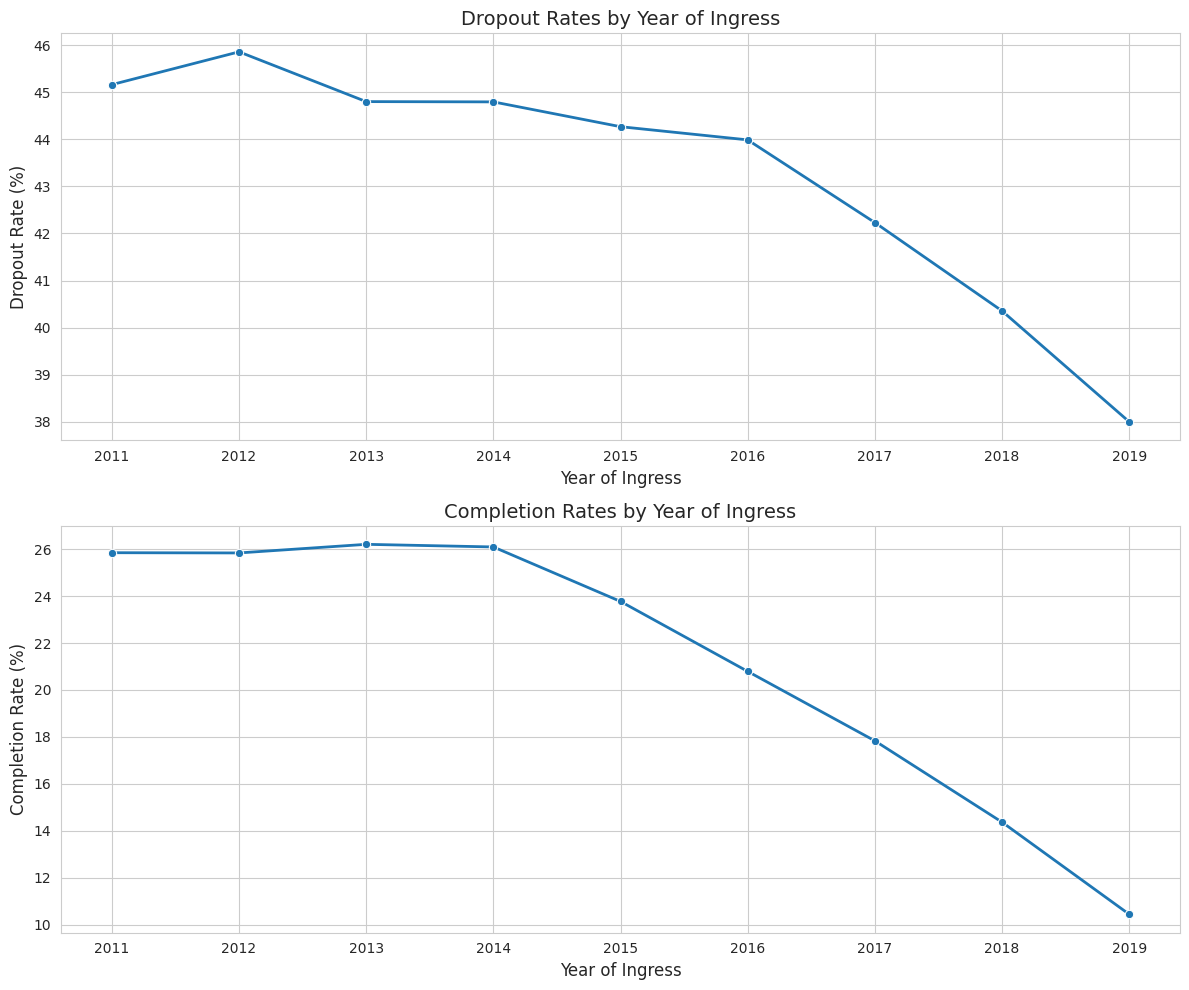

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot dropout rates by year
sns.lineplot(
    data=year_trend_data, 
    x='Ano de Ingresso', 
    y='Taxa de Desistência Acumulada - TDA',
    marker='o',
    linewidth=2,
    ax=axes[0]
)
axes[0].set_title('Dropout Rates by Year of Ingress', fontsize=14)
axes[0].set_ylabel('Dropout Rate (%)', fontsize=12)
axes[0].set_xlabel('Year of Ingress', fontsize=12)

# Plot completion rates by year
sns.lineplot(
    data=year_trend_data, 
    x='Ano de Ingresso', 
    y='Taxa de Conclusão Acumulada - TCA',
    marker='o',
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title('Completion Rates by Year of Ingress', fontsize=14)
axes[1].set_ylabel('Completion Rate (%)', fontsize=12)
axes[1].set_xlabel('Year of Ingress', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#analisar dropout pelo ano do curso 1,2,3,4 ou 5